In [125]:
import numpy as np
import pandas as pd

In [126]:
df = pd.read_csv(r"C:\Users\Shobhan Sarkar\OneDrive\Desktop\ACM SIGCHI\W2-ML\segmentation data.csv")

In [127]:
df.head(100)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
95,100000096,0,0,58,2,268340,1,1
96,100000097,1,1,61,2,135070,1,1
97,100000098,0,0,34,1,134794,1,2
98,100000099,0,0,36,1,120153,1,1


In [128]:
df.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [130]:
df.isnull()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False


In [131]:
print(df.isnull().sum())

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64


In [132]:
df = df.drop(["ID"],axis=1)

In [133]:
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '60+']

# Create a new column 'AgeGroup' with categorical values
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Display the first few rows to check the new column
print(df.head())



   Sex  Marital status  Age  Education  Income  Occupation  Settlement size  \
0    0               0   67          2  124670           1                2   
1    1               1   22          1  150773           1                2   
2    0               0   49          1   89210           0                0   
3    0               0   45          1  171565           1                1   
4    0               0   53          1  149031           1                1   

  AgeGroup  
0      60+  
1    21-30  
2    41-50  
3    41-50  
4    51-60  


In [134]:
# Optionally, you can convert the age groups to numeric labels if needed
df['AgeGroup'] = df['AgeGroup'].cat.codes

# Display the first few rows to check the new column
print(df.head())

   Sex  Marital status  Age  Education  Income  Occupation  Settlement size  \
0    0               0   67          2  124670           1                2   
1    1               1   22          1  150773           1                2   
2    0               0   49          1   89210           0                0   
3    0               0   45          1  171565           1                1   
4    0               0   53          1  149031           1                1   

   AgeGroup  
0         5  
1         1  
2         3  
3         3  
4         4  


In [135]:
df = df.drop(["Age"],axis=1)

In [136]:


df.head(10)

,Sex,Marital status,Education,Income,Occupation,Settlement size,AgeGroup
0,0,0,2,124670,1,2,5
1,1,1,1,150773,1,2,1
2,0,0,1,89210,0,0,3
3,0,0,1,171565,1,1,3
4,0,0,1,149031,1,1,4
5,0,0,1,144848,0,0,2
6,0,0,1,156495,1,1,4
7,0,0,1,193621,2,1,2
8,0,1,2,151591,0,0,5
9,0,1,1,174646,2,0,1


In [137]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_cols = ['Income']

# Create a StandardScaler object
scaler = StandardScaler()

# Scale the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
#df= scaler.fit_transform(df[Agegroup])
# Display the dataframe after scaling
df.head()


,Sex,Marital status,Education,Income,Occupation,Settlement size,AgeGroup
0,0,0,2,0.097524,1,2,5
1,1,1,1,0.782654,1,2,1
2,0,0,1,-0.833202,0,0,3
3,0,0,1,1.328386,1,1,3
4,0,0,1,0.736932,1,1,4


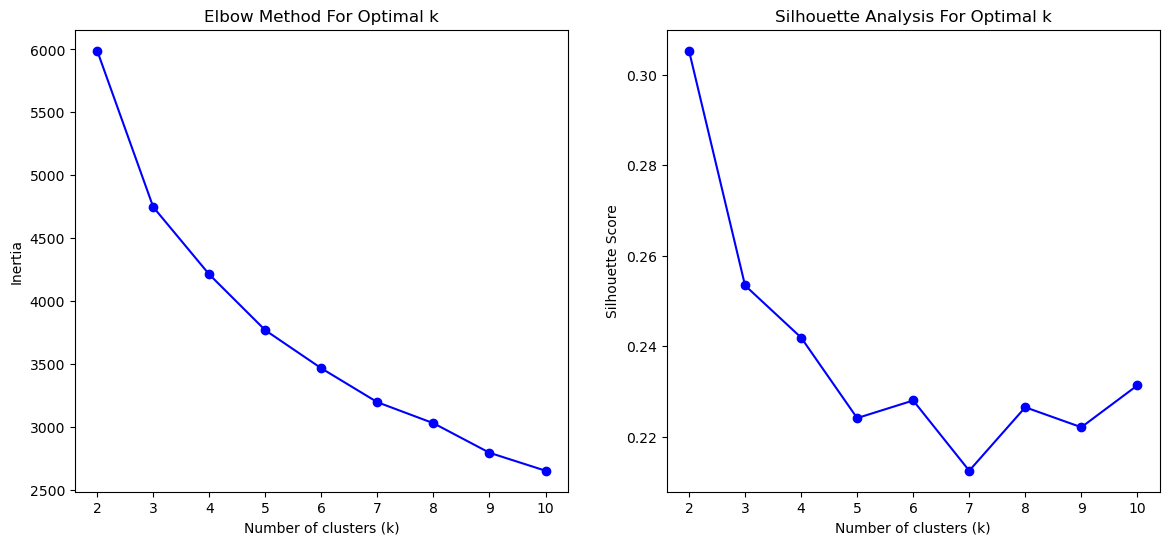

In [138]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Define the range of K values
k_values = range(2, 11)

# Lists to store inertia and silhouette scores
inertia = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    
    inertia.append(kmeans.inertia_)
    
    # Calculate the silhouette score
    score = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the inertia and silhouette scores
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')

plt.show()


In [148]:
optimal_k = 4

# Fit the KMeans model with the optimal K value
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df)

# Store the silhouette score and the labels
final_silhouette_score = silhouette_score(df, kmeans.labels_)
labels = kmeans.labels_

print(f"Optimal K: {optimal_k}")
print(f"Silhouette Score: {final_silhouette_score}")


Optimal K: 4
Silhouette Score: 0.2418952777503294


In [149]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs


# Define the ranges for hyperparameters
eps_values = [0.1, 0.2, 0.5, 1, 2]
min_samples_values = [3, 4, 5, 6]

# Initialize variables to store the best parameters and score
best_eps = None
best_min_samples = None
best_silhouette_score = -1  # Initialize to a very low value

# Nested loop to test all combinations of eps and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        # Initialize DBSCAN with the current parameters
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        
        # Fit the model
        labels = dbscan.fit_predict(df)
        
        # Calculate the silhouette score
        # Note: Silhouette score is only defined for clusters with more than 1 cluster
        if len(set(labels)) > 1:
            score = silhouette_score(df, labels)
            # Update best parameters if the current score is better
            if score > best_silhouette_score:
                best_silhouette_score = score
                best_eps = eps
                best_min_samples = min_samples

# Print the best parameters and the corresponding silhouette score
print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")
print(f"Best silhouette score: {best_silhouette_score}")


Best eps: 0.5
Best min_samples: 3
Best silhouette score: 0.44043051089167795
